# 딥러닝

In [1]:
from IPython.core.interactiveshell import InteractiveShell # 모든 명령어 출력
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML # 화면 좌우 크기 100%
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings # 파이썬 버전에 따른 오류 출력 방지
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pylab as plt

In [3]:
from IPython.display import Image
width = 800; height = 600
dir_path = r'D:\ASSIST\img\deep learning'

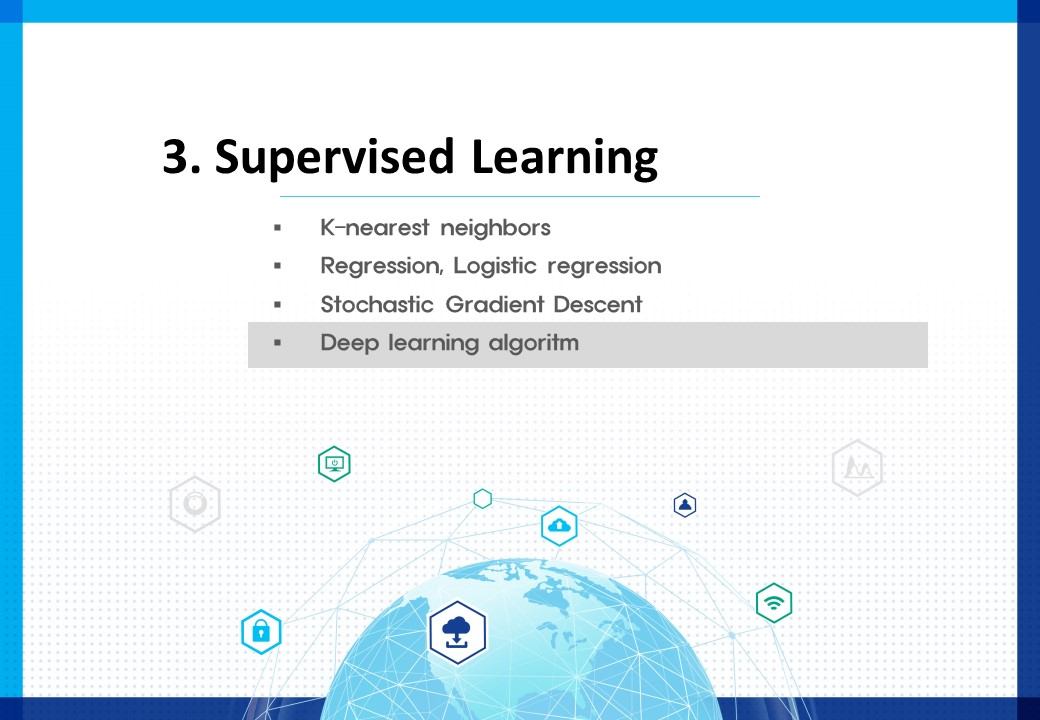

In [4]:
Image(filename= dir_path + '/슬라이드1.jpg', width=width, height=height)

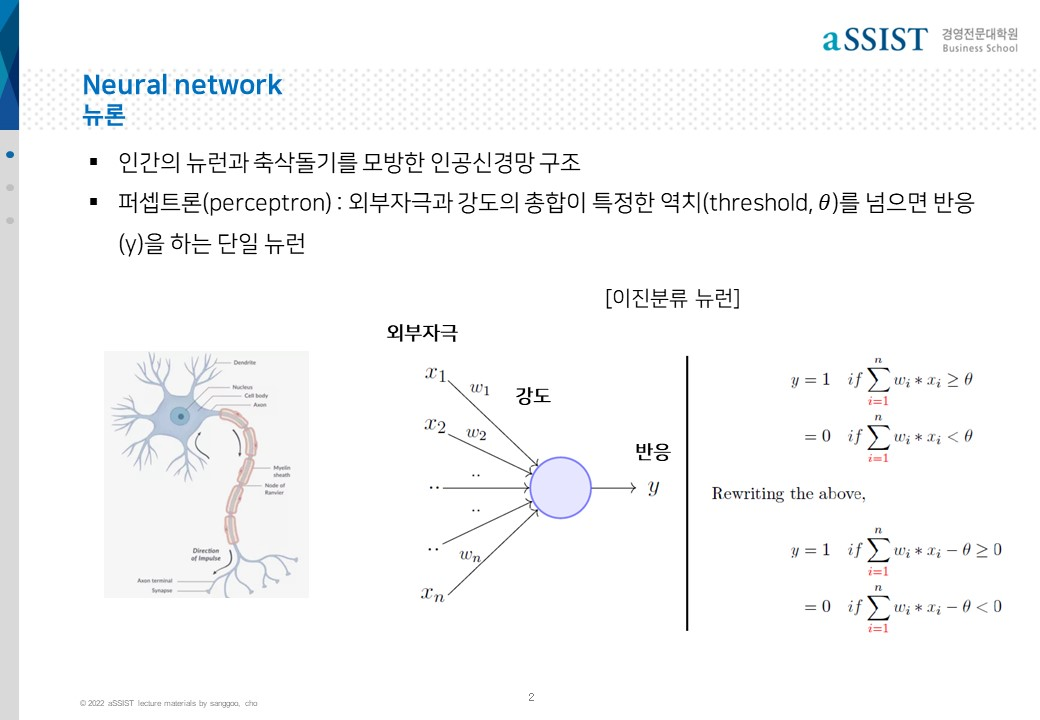

In [5]:
Image(filename= dir_path + '/슬라이드2.jpg', width=width, height=height)

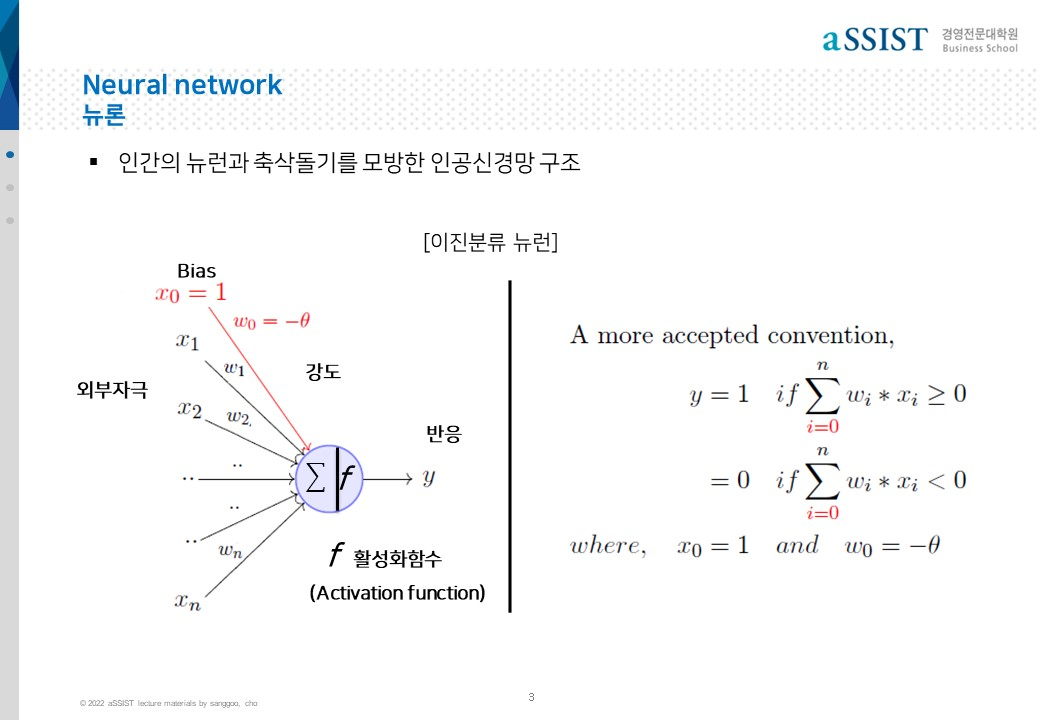

In [6]:
Image(filename= dir_path + '/슬라이드3.jpg', width=width, height=height)

# XOR problem solving with hidden layer, non linear transformation

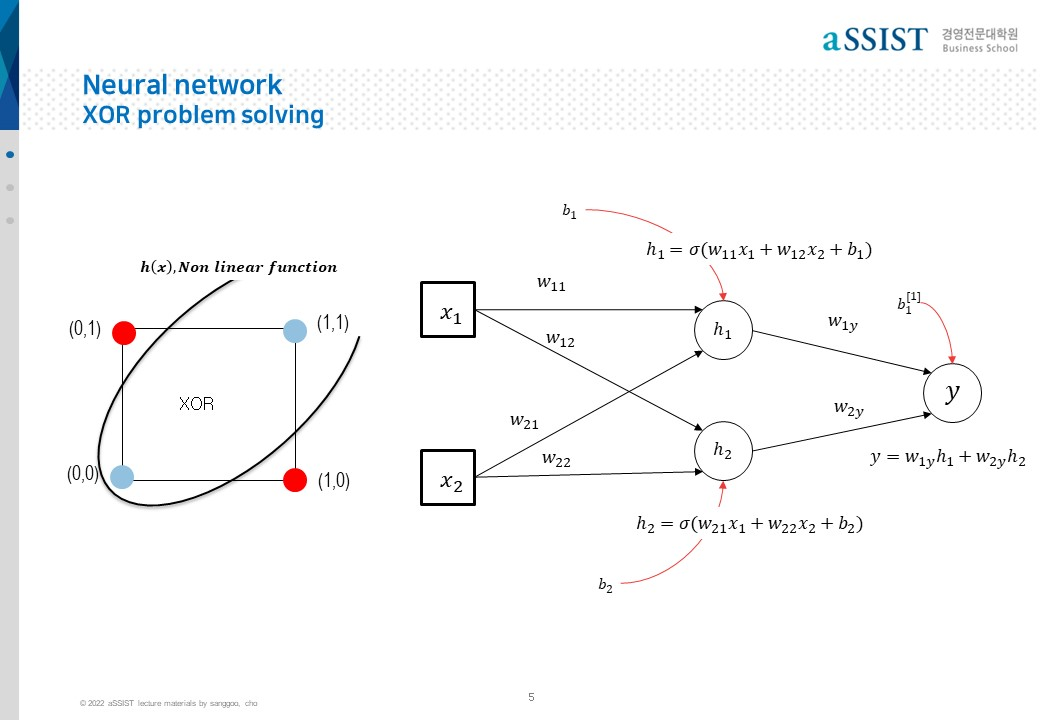

In [8]:
Image(filename= dir_path + '/슬라이드5.jpg', width=width, height=height)

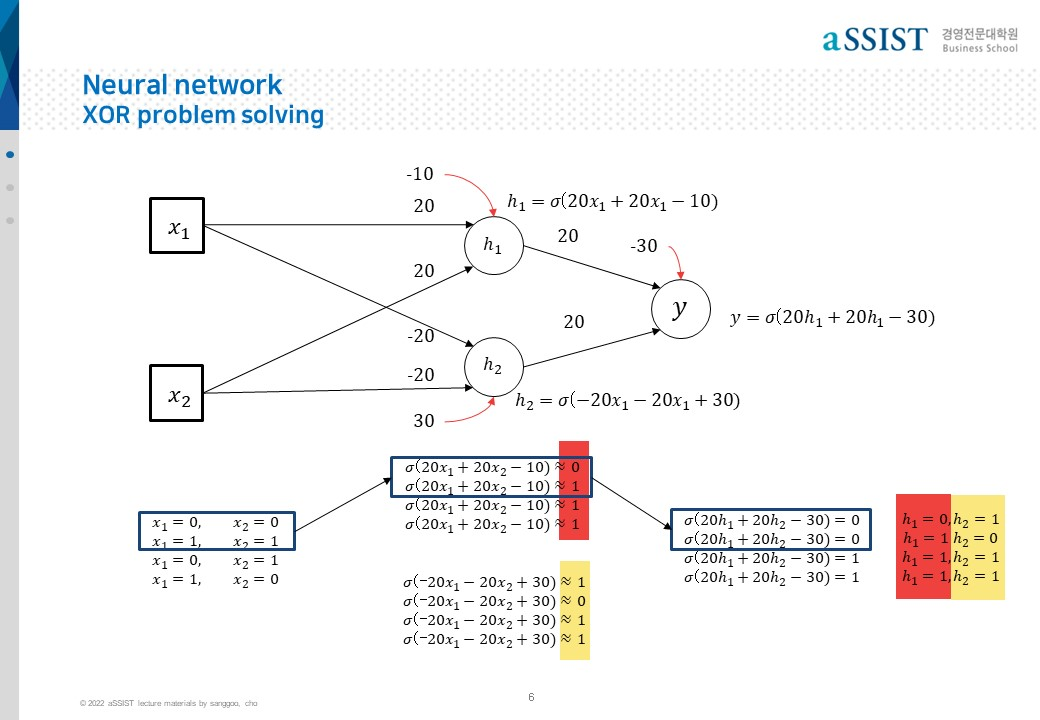

In [9]:
Image(filename= dir_path + '/슬라이드6.jpg', width=width, height=height)

In [10]:
X = np.array([[0,0], [1,1], [0,1], [1,0]])
X

array([[0, 0],
       [1, 1],
       [0, 1],
       [1, 0]])

In [11]:
H = np.array([[20, -20], [20, -20]])
H

array([[ 20, -20],
       [ 20, -20]])

## Fully Connected Nueral Network (FNN)

In [12]:
fully_connected = np.dot(X, H)
layer_output = fully_connected + np.array([-10, 30])
layer_output

array([[-10,  30],
       [ 30, -10],
       [ 10,  10],
       [ 10,  10]])

In [13]:
np.logical_not(layer_output < 0)*1

array([[0, 1],
       [1, 0],
       [1, 1],
       [1, 1]])

### <font color='brown'>  deep learning 은 각 layer의 노드간 연결선(신호강도)의 세기(w)와 bias(b)를 찾는 과정 (y = wx + b, 선형회귀식을 중첩한 비선형 구조)
### 선형변환(y= wx =b)을 비선형구조로 만드는 방법은 활성화 함수(역치)

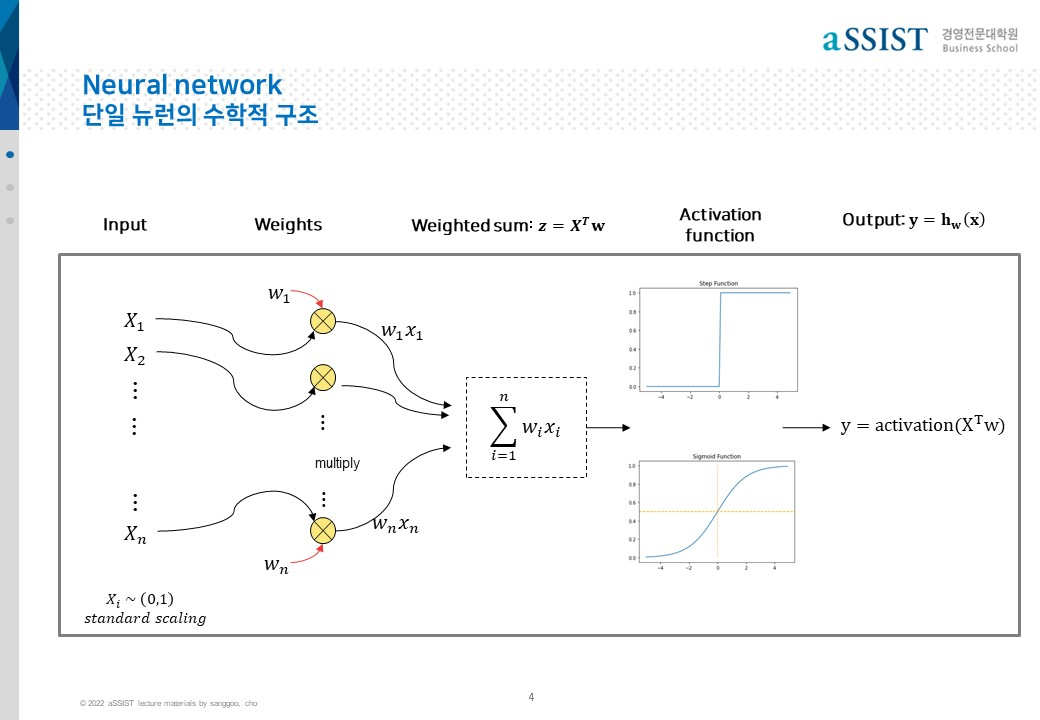

In [15]:
Image(filename= dir_path + '/슬라이드4.jpg', width=width, height=height)

# <font color='blue'> 가. Perceptron과 활성화 함수 - 비선형 함수(Nonlinear function)

## 1. 계단 함수(Step function)


Text(0.5, 1.0, 'Step Function')

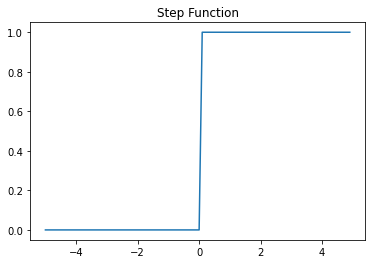

In [13]:
import numpy as np
def step(x):
    return np.array(x > 0, dtype=np.int)
    
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()

## 2. 시그모이드 함수(Sigmoid function)와 기울기 소실

시그모이드 함수의 출력값이 0 또는 1에 가까워지면, 그래프의 기울기가 완만해져 그 값은 0에 가까워지는데 역전파 과정에서 0에 가까운 아주 작은 기울기가 곱해지게 되면, 앞단에는 기울기가 잘 전달되지 않게 되는 현상을 기울기 소실(Vanishing Gradient) 문제

Text(0.5, 1.0, 'Sigmoid Function')

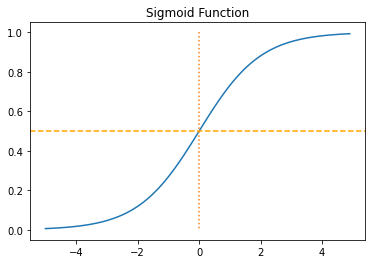

In [14]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
    
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.axhline(y=0.5, color='orange', linestyle='--')
plt.title('Sigmoid Function')
plt.show()

## 3. 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)

하이퍼볼릭탄젠트 함수의 경우에는 시그모이드 함수와는 달리 0을 중심으로 하고 있는데, 이때문에 시그모이드 함수와 비교하면 반환값의 변화폭이 더 커서 시그모이드 함수보다는 기울기 소실 증상이 적은 편이라 은닉층에서 시그모이드 함수보다는 많이 사용

Text(0.5, 1.0, 'Tanh Function')

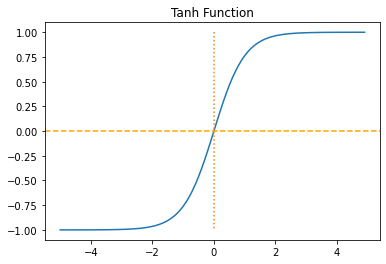

In [15]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

## 4. 렐루 함수(ReLU)

렐루 함수는 음수를 입력하면 0을 출력하고, 양수를 입력하면 입력값을 그대로 반환하게 되어 렐루 함수는 특정 양수값에 수렴하지 않으므로 깊은 신경망에서 시그모이드 함수보다 훨씬 더 잘 작동
렐루 함수는 시그모이드 함수와 하이퍼볼릭탄젠트 함수와 같이 어떤 연산이 필요한 것이 아니라 단순 임계값이므로 연산 속도도 빠르나 여전히 문제점이 존재하는데, 입력값이 음수면 기울기도 0이 되어 이 뉴런은 다시 회생하는 것이 매우 어렵워 이 문제를 죽은 렐루(dying ReLU)라 함

Text(0.5, 1.0, 'Relu Function')

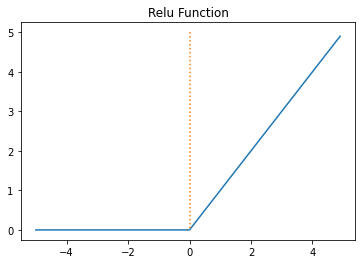

In [16]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

## 5. 리키 렐루(Leaky ReLU)
죽은 렐루를 보완하기 위해 ReLU의 변형 함수들이 등장하기 시작했습니다. 변형 함수는 여러 개가 있지만 Leaky ReLU는 입력값이 음수일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환

Text(0.5, 1.0, 'Leaky ReLU Function')

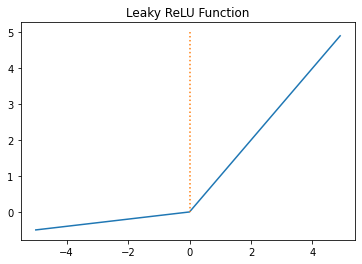

In [17]:
a = 0.1

def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

## 6. 소프트맥스 함수(Softamx function)
은닉층에서 ReLU(또는 ReLU 변형) 함수들을 사용하는 것이 일반적이지만 분류 문제를 로지스틱 회귀와 소프트맥스 회귀를 출력층에 적용하여 사용합니다.

소프트맥스 함수는 시그모이드 함수처럼 출력층의 뉴런에서 주로 사용되는데, 시그모이드 함수가 두 가지 선택지 중 하나를 고르는 이진 분류 (Binary Classification) 문제에 사용된다면 세 가지 이상의 (상호 배타적인) 선택지 중 하나를 고르는 다중 클래스 분류(MultiClass Classification) 문제에 주로 사용

Text(0.5, 1.0, 'Softmax Function')

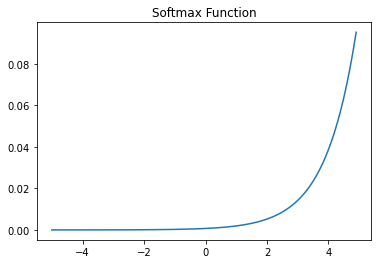

In [18]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

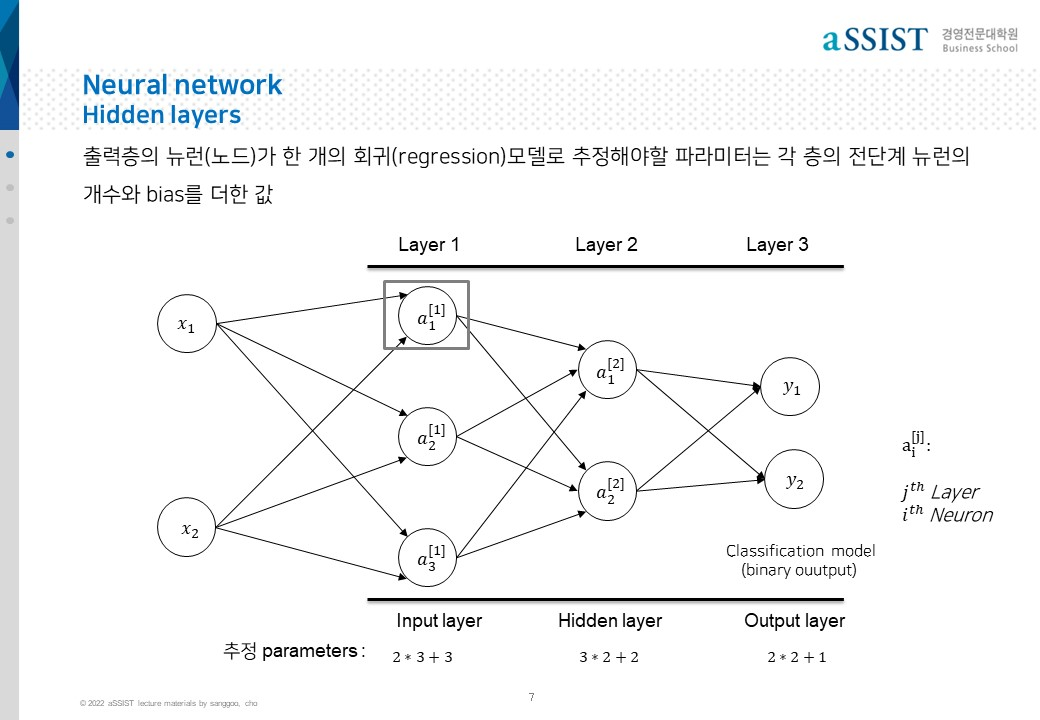

In [16]:
Image(filename= dir_path + '/슬라이드7.jpg', width=width, height=height)

- Perceptron Learning Rule states that the algorithm would automatically learn the optimal weight coefficients. The input features are then multiplied with these weights to determine if a neuron fires or not.

<img src='https://www.simplilearn.com/ice9/free_resources_article_thumb/Perceptron/symbolic-representation-of-perceptron-learning-rule_5.jpg'>

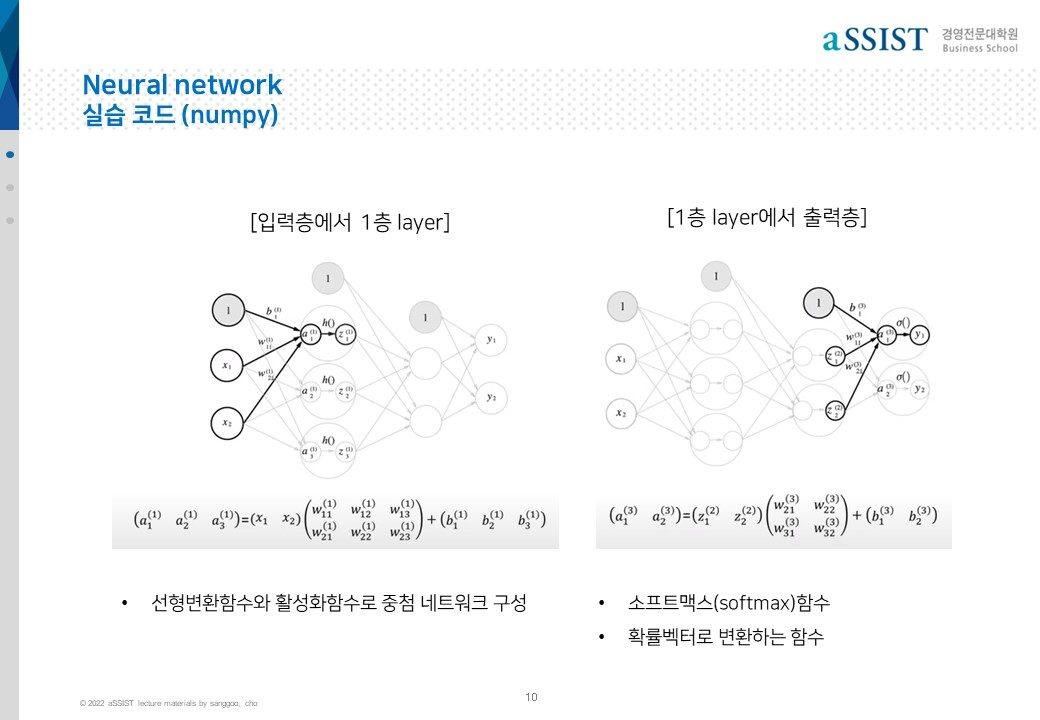

In [17]:
Image(filename= dir_path + '/슬라이드10.jpg', width=width, height=height)

## Forward Neural Network: 이론과 실습

In [21]:
def identity_function(X):
    return x

def softmax(x):
    if x.ndim ==2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        
        return y.T    
    x = x - np.max(x) # 오버플로 방지
    return np.exp(x) / np.sum(np.exp(x))

In [22]:
x = np.array([-1,1,2])
np.array(x>0, dtype=np.int)

array([0, 1, 1])

In [23]:
np.exp(1000)

inf

In [24]:
a = np.array([1000,1400,1500])
np.exp(a)/np.sum(np.exp(a))

c = np.max(a)
np.exp(a-c)/np.sum(np.exp(a-c))

array([nan, nan, nan])

array([7.12457641e-218, 3.72007598e-044, 1.00000000e+000])

In [25]:
def init_network():
    network={}
    network['w1'] = np.array([[0.1,0.3,0.5], [0.2,0.4,0.6]])
    network['b1'] = np.array([[0.1,0.2,0.3]])
    network['w2'] = np.array([[0.1,0.4], [0.2,0.5], [0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['w3'] = np.array([[0.1,0.3], [0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
                              
    return network

In [26]:
def forward(network, x):
    w1, w2, w3 = network['w1'], network['w2'], network['w3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, w1) + b1   # Affine
    z1 = sigmoid(a1)          # sigmoid
    
    a2 = np.dot(z1, w2) + b2  # Affine
    z2 = sigmoid(a2)          # sigmoid
    
    a3 = np.dot(z2, w3) + b3  # Affine
    y = identity_function(a3) # Indentity
    y = softmax(a3)          # softmax
    
    return y

### 실행

In [27]:
network = init_network()
network.items()

dict_items([('w1', array([[0.1, 0.3, 0.5],
       [0.2, 0.4, 0.6]])), ('b1', array([[0.1, 0.2, 0.3]])), ('w2', array([[0.1, 0.4],
       [0.2, 0.5],
       [0.3, 0.6]])), ('b2', array([0.1, 0.2])), ('w3', array([[0.1, 0.3],
       [0.2, 0.4]])), ('b3', array([0.1, 0.2]))])

In [28]:
x = np.array([1.2, 0.5])
y = forward(network, x)
print(y)

[[0.40599692 0.59400308]]


### 신경망 학습(Neural Network Learning)은 Error(손실함수)를 forward/backward propagation으로 계속 줄여 나가면서 최적의 w, b를 찾는 최적화과정

In [29]:
true = np.array([1,0,0,1,1])
yhat = np.array([1,0,0,1,0])
yhat_prob_a = np.array([0.9,0.2,0.3,0.8,0.4]) # 예측 모형 A의 예측 확률벡터
yhat_prob_b = np.array([0.6,0.3,0.4,0.6,0.2]) # 예측 모형 B의 예측 확률벡터

In [30]:
def mean_squared_error(y, t):
    return 0.5*np.sum((y-t)**2)

In [31]:
mean_squared_error(true, yhat)

0.5

In [32]:
from math import log
def cross_entropy(y, t):
    delta = 1e-10 #  -inf 방지
    return -np.sum(t*np.log(y+delta))

In [33]:
cross_entropy(true, yhat_prob_a)
cross_entropy(true, yhat_prob_b)

11.51292546476023

16.118095650818322

In [38]:
from math import log
from numpy import mean
 
def cross_entropy(y, t):
    delta = 1e-10 #  -inf 방지
    
    return -np.sum(t*np.log(y+delta))

In [41]:
p = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
q = np.array([0.8, 0.9, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.1, 0.3])
cross_entropy(p, q)

25.328436022534504

In [42]:
cross_entropy(p, q)

25.328436022534504

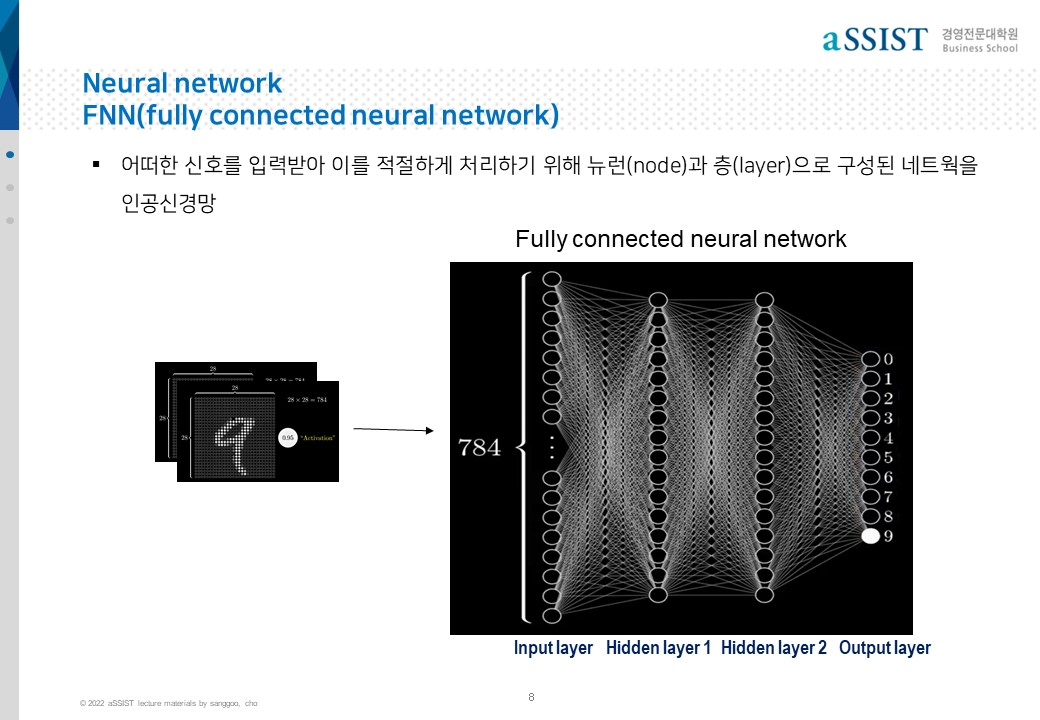

In [18]:
Image(filename= dir_path + '/슬라이드8.jpg', width=width, height=height)

<img src='https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile23.uf.tistory.com%2Fimage%2F996A04425AB85ED0260F3E'>

## What is 'deep' in deep learning? data representation

<img src='https://miro.medium.com/proxy/1*egtdIokskeDG1Y66YkfPbw.png'>

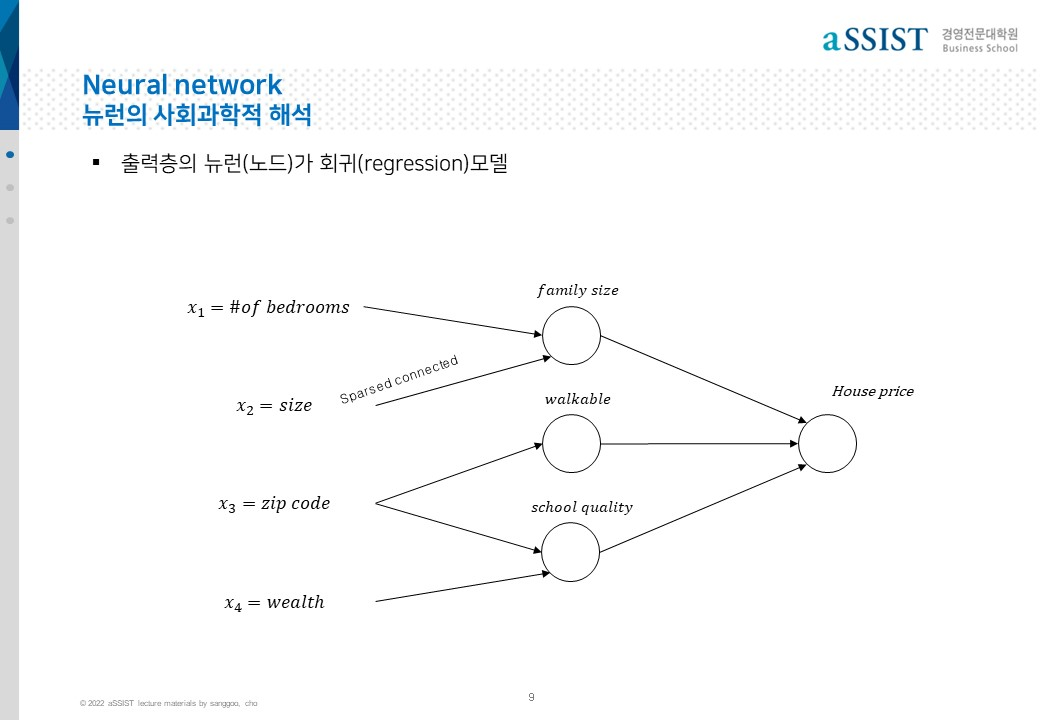

In [19]:
Image(filename= dir_path + '/슬라이드9.jpg', width=width, height=height)

# <font color='blue'> 나. 회귀생성모델(regression model)과 인공신경망(Artificial Neural Network)

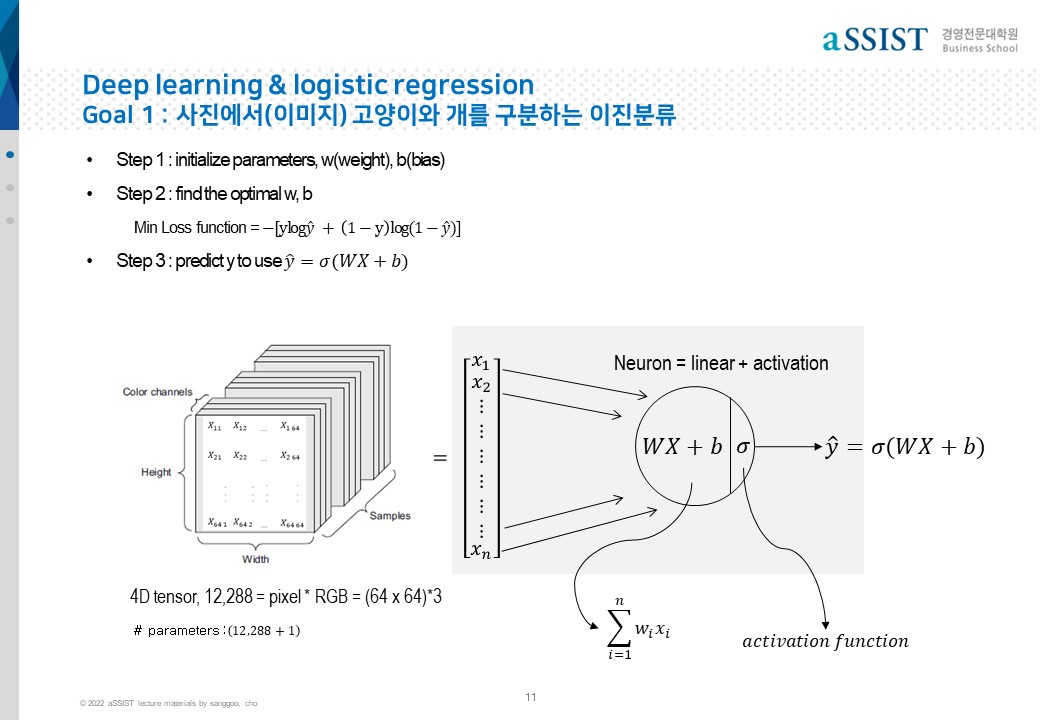

In [20]:
Image(filename= dir_path + '/슬라이드11.jpg', width=width, height=height)

### 데이터 생성

(0.49741654521067846, 0.29131649696715206)

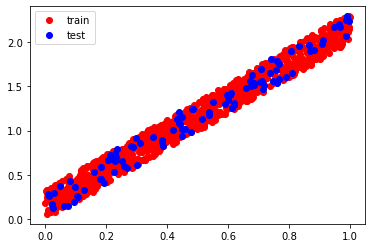

In [46]:
x_train= np.random.random((1000,1))
np.mean(x_train), np.std(x_train)
y_train = x_train*2 + np.random.random((1000,1))/3.0

x_test= np.random.random((100,1))
y_test = x_test*2 + np.random.random((100,1))/3.0

plt.plot(x_train, y_train, 'ro')
plt.plot(x_test, y_test, 'bo')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 1. Scikit-learn API의 linear regression

In [47]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# 모델구성하기
model = linear_model.LinearRegression()

# 학습하고 예측
y_pred = model.fit(x_train, y_train).predict(x_test)

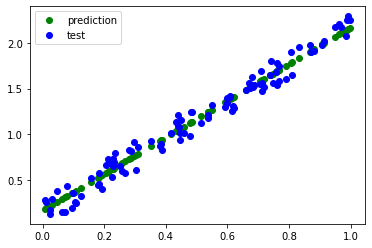

절편: [0.1659026], 기울기:[[2.00244269]], mse: 0.008864906623285446


In [48]:
plt.plot(x_test, y_pred, 'go')
plt.plot(x_test, y_test, 'bo')
plt.legend(['prediction', 'test'], loc='upper left')
plt.show()

# 파라미터 추정과 평가
print(f'절편: {model.intercept_}, 기울기:{model.coef_}, mse: {mean_squared_error(y_test, y_pred)}')

# 2. Keras 퍼셉트론 신경망

In [49]:
from keras.models import Sequential
from keras.layers import Dense

입력변수가 1d tensor

In [50]:
# 모델구성
model = Sequential()
model.add(Dense(1, input_dim=1))

# Parameters (weight, bias)
- The # of weights : {입력행렬 차원(1차원) x layer1 뉴런수(1 nodes)} = 1
- The # of bias : layer1 뉴런 수(1 nodes) = 1
- 추정할 파라미터 개수는 1+1 = 2

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [52]:
# 학습하기
model.compile(optimizer='rmsprop', loss='mse')
hist = model.fit(x_train, y_train, epochs=10, batch_size=64) # epoch을 증가시켜보기

Epoch 1/10
16/16 [==============================] - 0s 619us/step - loss: 2.9594
Epoch 2/10
16/16 [==============================] - 0s 598us/step - loss: 2.8662
Epoch 3/10
16/16 [==============================] - 0s 656us/step - loss: 2.7870
Epoch 4/10
16/16 [==============================] - 0s 639us/step - loss: 2.7109
Epoch 5/10
16/16 [==============================] - 0s 598us/step - loss: 2.6353
Epoch 6/10
16/16 [==============================] - 0s 665us/step - loss: 2.5615
Epoch 7/10
16/16 [==============================] - 0s 598us/step - loss: 2.4891
Epoch 8/10
16/16 [==============================] - 0s 598us/step - loss: 2.4176
Epoch 9/10
16/16 [==============================] - 0s 598us/step - loss: 2.3477
Epoch 10/10
16/16 [==============================] - 0s 653us/step - loss: 2.2787


절편: [0.1675006], 기울기:[[-0.59186673]]


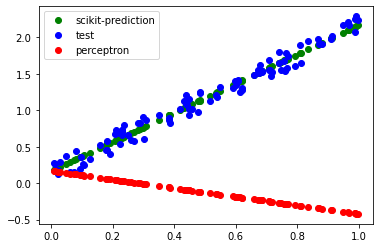

In [53]:
w, b = model.get_weights()
print(f'절편: {b}, 기울기:{w}')

plt.plot(x_test, y_pred, 'go')
plt.plot(x_test, y_test, 'bo')
plt.plot(x_test, b + w*x_test, 'ro')
plt.legend(['scikit-prediction', 'test', 'perceptron'], loc='upper left')
plt.show()

### <font color ='red'> epoch을 200으로 증가시키면 예측을 잘한다. 200 epoch을 훈련후 다시 그려보기

dict_keys(['loss'])

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'MSE')

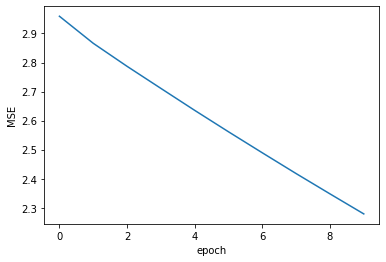

In [54]:
# 학습과정 확인하기
hist.history.keys()
plt.plot(hist.history['loss'])
plt.xlabel('epoch'); plt.ylabel('MSE')

In [55]:
# 모델 평가
loss = model.evaluate(x_test, y_test, batch_size=30)
print(f'mse: {loss}')

4/4 [==============================] - 0s 665us/step - loss: 2.1782
mse: 2.1782052516937256


# 3. FNNM(Forward Neural Network Model) with one hidden layer
## Shallow learning model
https://keras.io/api/models/

### <font color = 'purple'> Regression
### <font color = 'purple'>  회귀예측이기 때문에 최종 layer에는 1개로 activation 함수없이 구현

In [56]:
# 모델구성
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', name="layer1"))  # Try Hidden layer의 노드(뉴런) 개수 증감
model.add(Dense(1, name="layer2"))

### Parameters (weight, bias)
- The # of weights : {입력행렬 차원(1차원) x layer1 뉴런수(10 nodes)} + {layer1 (노두수(10 nodes) x layer2 노드수(1 node))} = (1x10) + (10) = 20
- The # of bias : layer1 뉴런 수(10 nodes) + layer2 뉴런수(1 nodes) = 10+1 = 11
- 추정할 파라미터 개수는 20+11 = 31

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 10)                20        
                                                                 
 layer2 (Dense)              (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [58]:
# 학습하기
model.compile(optimizer='rmsprop', loss='mse')
hist = model.fit(x_train, y_train, epochs=50, batch_size=64, verbose= 0) # epoch을 증가시켜보기

In [59]:
# 노드(뉴런) 개수만큼 weight(b, w)가 생성
model.get_weights()

[array([[-0.61230075,  0.18066964,  0.12311289,  0.7715994 ,  0.85884696,
         -0.35585317, -0.42208233, -0.10848749,  0.6174358 , -0.08743829]],
       dtype=float32),
 array([ 0.        , -0.18160398, -0.1232717 ,  0.04617337,  0.04613532,
         0.        ,  0.        ,  0.        ,  0.04964954,  0.        ],
       dtype=float32),
 array([[-0.13418204],
        [-0.45625445],
        [-0.22201324],
        [ 1.0356569 ],
        [ 1.0525388 ],
        [-0.5858276 ],
        [-0.01803994],
        [-0.16072631],
        [ 0.48011482],
        [ 0.16000241]], dtype=float32),
 array([0.04515172], dtype=float32)]

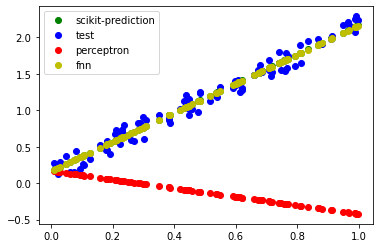

In [60]:
plt.plot(x_test, y_pred, 'go')
plt.plot(x_test, y_test, 'bo')
plt.plot(x_test, b + w*x_test, 'ro')
plt.plot(x_test, model.predict(x_test), 'yo')
plt.legend(['scikit-prediction', 'test', 'perceptron', 'fnn'], loc='upper left')
plt.show()

In [61]:
# 모델 평가
loss = model.evaluate(x_test, y_test, batch_size=30)
print(f'mse: {loss}')

4/4 [==============================] - 0s 666us/step - loss: 0.0089
mse: 0.008883101865649223


dict_keys(['loss'])

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'MSE')

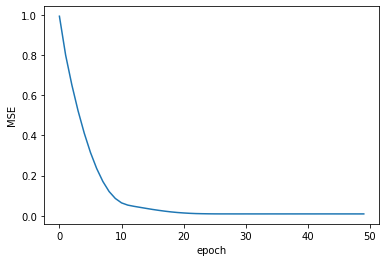

In [62]:
# 학습과정 확인하기
hist.history.keys()
plt.plot(hist.history['loss'])
plt.xlabel('epoch'); plt.ylabel('MSE')

# 4. FNNM(Forward Neural Network Model) with two hidden layer
## Deep learning model
Hidden layer를 추가할 수록 예측 성능은 높아지게 됨 

In [63]:
# 모델구성
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', name="layer1"))
model.add(Dense(10, activation='relu', name="layer2"))  
model.add(Dense(1, name="layer3"))

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 10)                20        
                                                                 
 layer2 (Dense)              (None, 10)                110       
                                                                 
 layer3 (Dense)              (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [65]:
# 학습하기
model.compile(optimizer='rmsprop', loss='mse')
hist = model.fit(x_train, y_train, epochs=50, batch_size=64, verbose= 0)

In [66]:
# 모델 평가
loss = model.evaluate(x_test, y_test, batch_size=30)
print(f'mse: {loss}')

4/4 [==============================] - 0s 666us/step - loss: 0.0088
mse: 0.008832637220621109


dict_keys(['loss'])

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'MSE')

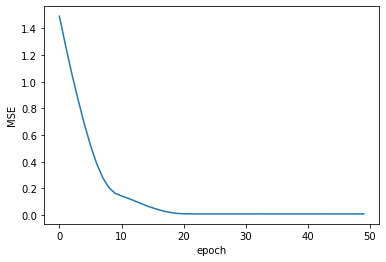

In [67]:
# 학습과정 확인하기
hist.history.keys()
plt.plot(hist.history['loss'])
plt.xlabel('epoch'); plt.ylabel('MSE')

# <font color='blue'> 다. Binary Classification : 실습 diabetes dataset

### 1.Loading the diabets dataset in Keras

In [78]:
from sklearn.datasets import load_wine
import pandas as pd

load_wine().keys()
df = pd.DataFrame(load_wine().data, columns=load_wine().feature_names)
df['target'] = load_wine().target
df

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### 2. 데이터셋 생성하기

In [79]:
df['target'].value_counts()
df = df[df['target'] !=2]
df.shape

1    71
0    59
2    48
Name: target, dtype: int64

(130, 14)

In [80]:
x_train = df.iloc[:100,0:13]
y_train = df.iloc[:100,13]
x_test = df.iloc[100:,0:13]
y_test = df.iloc[100:,13]

### 3. 모델 구성하기
### <font color = 'purple'> Multicalss Classification 
### <font color = 'purple'> 입력변수 8개를 받아 2개 hidden을 만들고 마지막 레이어는 sigmoid 활성화함수로 모델 구현

In [81]:
model = Sequential()
model.add(Dense(12, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### 4. 모델 학습과정 설정하기

In [82]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 5. 모델 학습시키기

In [83]:
model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
2/2 [==============================] - 0s 2ms/step - loss: 163.3367 - accuracy: 0.4100
Epoch 2/10
2/2 [==============================] - 0s 2ms/step - loss: 156.9611 - accuracy: 0.4100
Epoch 3/10
2/2 [==============================] - 0s 1ms/step - loss: 150.5501 - accuracy: 0.4100
Epoch 4/10
2/2 [==============================] - 0s 2ms/step - loss: 144.4729 - accuracy: 0.4100
Epoch 5/10
2/2 [==============================] - 0s 2ms/step - loss: 138.3048 - accuracy: 0.4100
Epoch 6/10
2/2 [==============================] - 0s 2ms/step - loss: 132.1927 - accuracy: 0.4100
Epoch 7/10
2/2 [==============================] - 0s 1ms/step - loss: 125.9677 - accuracy: 0.4100
Epoch 8/10
2/2 [==============================] - 0s 2ms/step - loss: 120.0310 - accuracy: 0.4100
Epoch 9/10
2/2 [==============================] - 0s 2ms/step - loss: 114.1072 - accuracy: 0.4100
Epoch 10/10
2/2 [==============================] - 0s 2ms/step - loss: 109.0207 - accuracy: 0.4100


# <font color='blue'> 라. Multiclass Classification : 실습 The MNIST dataset in Keras

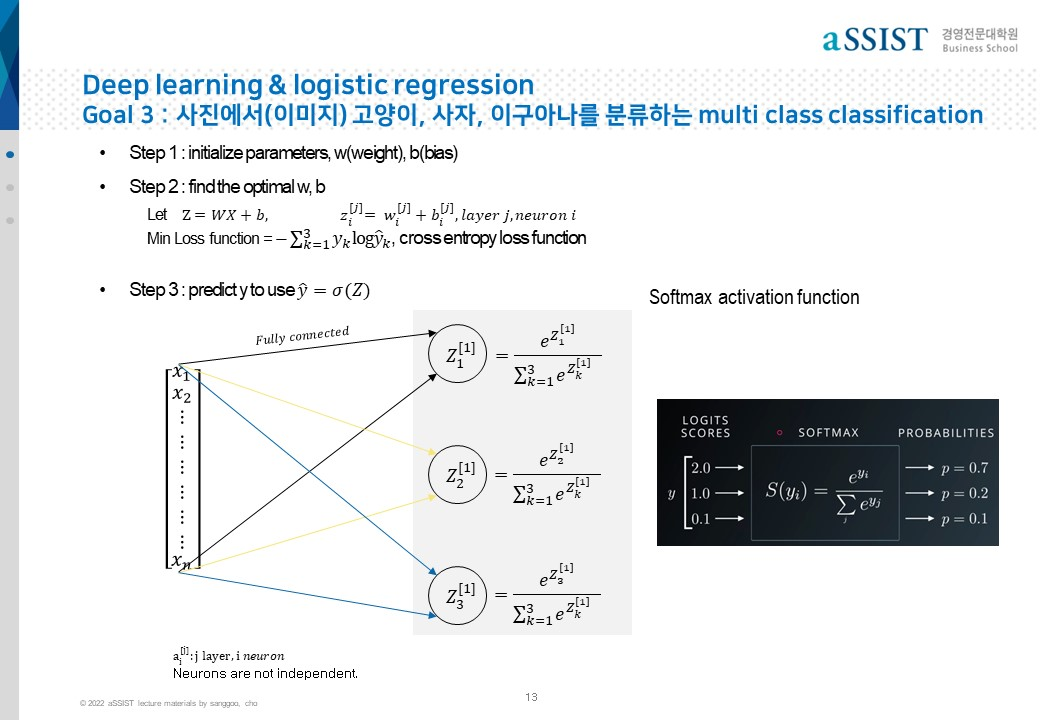

In [22]:
Image(filename= dir_path + '/슬라이드13.jpg', width=width, height=height)

### 1.Loading the MNIST dataset in Keras

In [112]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [113]:
train_images.shape
len(train_labels)
test_images.shape
len(test_labels)
test_labels

(60000, 28, 28)

60000

(10000, 28, 28)

10000

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### 2. The network architecture

### <font color = 'purple'> Multicalss Classification 
### <font color = 'purple'> 10개를 구분하여야 하기 때문에 최종 layer에는 10개로 Softmax로 모델 구현

In [114]:
x_train.shape

(60000, 28, 28)

In [115]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

### 3. The compilation step
### <font color = 'purple'> 다중분류이기 떄문에 'categorical_crossentropy'


In [117]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy', metrics=['accuracy'])

### 4. Preparing the image data (자료표준화)

In [118]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### 5. model fitting

In [119]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2556 - accuracy: 0.9257
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1040 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0688 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0499 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0373 - accuracy: 0.9888


In [120]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 788us/step - loss: 0.0738 - accuracy: 0.9788


In [121]:
print('test_acc:', test_acc)

test_acc: 0.9787999987602234


# End